### Step1-LoadData

In [198]:
import pickle 
import numpy as np

### read train and test data

In [199]:
with open("train_qa.txt","rb") as train:
    train_data=pickle.load(train)

In [200]:
with open("test_qa.txt","rb") as test:
    test_data=pickle.load(test)

### The length will be ?? 

In [201]:
len(test_data)

1000

In [202]:
len(train_data)

10000

### what the data look like??

#### The first element in the list is the story the second element is the question of the story the last element is the question answer

In [203]:
train_data[0]

(['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
 'no')

### Story is

In [204]:
" ".join(train_data[0][0])

'Mary moved to the bathroom . Sandra journeyed to the bedroom .'

### Question is

In [205]:
" ".join(train_data[0][1])

'Is Sandra in the hallway ?'

### Answer is 

In [206]:
" ".join(train_data[0][2])

'n o'

## Now we need to make an vocabulary of our large data to 

In [207]:
alldata=test_data+train_data

## Will make a set to contains the unique words

In [208]:
vocab=set()
for story,question,answer in alldata:
    vocab=vocab.union(set(story))
    vocab=vocab.union(set(question))
vocab.add("yes")
vocab.add("no")

# Vocab length is 

In [209]:
vocableng=len(vocab)+1  ## +1 for keras 

## Get all stories length

In [210]:
storieslength=[len(i[0]) for i in alldata]

In [211]:
max_story_len=max(storieslength)

In [212]:
Qlength=[len(i[1]) for i in alldata]

In [213]:
max_Qlength_len=max(Qlength)

In [214]:
max_Qlength_len

6

In [215]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [216]:
## time for preprocessing

In [217]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

In [218]:
# integer encode sequences of words
tokenizer = Tokenizer(filters=[])
tokenizer.fit_on_texts(vocab)

In [219]:
tokenizer.word_index

{'.': 25,
 '?': 13,
 'apple': 21,
 'back': 22,
 'bathroom': 16,
 'bedroom': 11,
 'daniel': 1,
 'discarded': 34,
 'down': 33,
 'dropped': 8,
 'football': 3,
 'garden': 2,
 'got': 32,
 'grabbed': 20,
 'hallway': 14,
 'in': 10,
 'is': 17,
 'john': 26,
 'journeyed': 18,
 'kitchen': 9,
 'left': 4,
 'mary': 5,
 'milk': 24,
 'moved': 23,
 'no': 35,
 'office': 30,
 'picked': 36,
 'put': 19,
 'sandra': 28,
 'the': 37,
 'there': 15,
 'to': 12,
 'took': 31,
 'travelled': 6,
 'up': 29,
 'went': 7,
 'yes': 27}

### Now the time to convert our text train data to numbers using keras tokenizer sequence 

In [220]:
train_Story_text=[]
train_question_text=[]
for story,question,answer in train_data:
    train_Story_text.append(story)
    train_question_text.append(question)
    

In [221]:
train_story_Seq=tokenizer.texts_to_sequences(train_Story_text)

In [222]:
train_story_Seq[0]

[5, 23, 12, 37, 16, 25, 28, 18, 12, 37, 11, 25]

In [223]:
train_Story_text[0]

['Mary',
 'moved',
 'to',
 'the',
 'bathroom',
 '.',
 'Sandra',
 'journeyed',
 'to',
 'the',
 'bedroom',
 '.']

#### now we need to padding the text to be sure that all the data that can goes to the neural netword are in same shape and length 

In [224]:
def vectorize_Story(data,word_index=tokenizer.word_index,max_story_len=max_story_len,max_question_len=max_Qlength_len):
    ## Stories
    x=[]
    ## question
    xq=[]
    ## correct answer ()
    y=[]
    
    for story,q,ans in data:
        X=[word_index[word.lower()] for word in story] ## index of each word in story
        XQ=[word_index[word.lower()] for word in q] ## index of each word in question
        Y=np.zeros(len(word_index)+1) ## array of zeros to can contains the reuslts 0 for no one for yes
        Y[word_index[ans]]=1 ## using logic to can assign 1 if result is yes
        ## append the result to  to can genrate the full document
        x.append(X)
        xq.append(XQ)
        y.append(Y)
        
   # RETURN TUPLE FOR UNPACKING
    return (pad_sequences(x, maxlen=max_story_len),pad_sequences(xq, maxlen=max_question_len), np.array(y))
    

In [225]:
story_train,ques_train,answer_train=vectorize_Story(train_data)

In [226]:
story_test,ques_test,answer_test=vectorize_Story(test_data)

In [227]:
story_test

array([[ 0,  0,  0, ..., 37, 11, 25],
       [ 0,  0,  0, ..., 37,  2, 25],
       [ 0,  0,  0, ..., 37,  2, 25],
       ...,
       [ 0,  0,  0, ..., 37, 21, 25],
       [ 0,  0,  0, ..., 37,  2, 25],
       [ 0,  0,  0, ..., 21, 15, 25]], dtype=int32)

In [228]:
len(story_test)

1000

In [229]:
answer_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [230]:
tokenizer.word_index['yes']

27

In [231]:
tokenizer.word_index['no']

35

In [232]:
sum(answer_test)

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0., 497.,   0.,   0.,   0.,   0.,   0.,
         0.,   0., 503.,   0.,   0.])

# Now the time for build the network
### -input encoder M 
### -input encoder C
### -Question Encoder 
### the network is based on this paper check it :
https://proceedings.neurips.cc/paper/2015/file/8fb21ee7a2207526da55a679f0332de2-Paper.pdf

In [233]:
from keras.models import Sequential, Model
from keras.layers.embeddings import Embedding
from keras.layers import Input, Activation, Dense, Permute, Dropout
from keras.layers import add, dot, concatenate
from keras.layers import LSTM

In [234]:
# Place holder for the length of story and questions since our network takes two inputs
input_sequence=Input((max_story_len,))
qu=Input((max_Qlength_len,))


In [235]:
# size of our vocabs
vocab_size=len(vocab)+1

In [236]:
#Encoder M
input_encoder_m=Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_size,output_dim=64)) ## 64 from paper
## add droup out to avoid the over fitting 
input_encoder_m.add(Dropout(0.3))

In [237]:
#Encoder C
input_encoder_c=Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_size,output_dim=max_Qlength_len))
## add droup out to avoid the over fitting 
input_encoder_c.add(Dropout(0.3))

In [238]:
question_Encoder=Sequential()
question_Encoder.add(Embedding(input_dim=vocab_size,output_dim=64,input_length=max_Qlength_len))
## add droup out to avoid the over fitting 
question_Encoder.add(Dropout(0.3))

In [239]:
input_encoded_m=input_encoder_m(input_sequence)
input_encoded_c=input_encoder_c(input_sequence)
question_Encoded=question_Encoder(qu)

In [240]:
## Now will use the dot product as the paper to can multiplt the m with questions and then passes it to soft max
match=dot([input_encoded_m,question_Encoded],axes=(2,2))
match=Activation('softmax')(match)

In [241]:
response=add([match,input_encoded_c])
response=Permute((2,1))(response)

In [242]:
answer=concatenate([response,question_Encoded])

In [243]:
answer

<KerasTensor: shape=(None, 6, 220) dtype=float32 (created by layer 'concatenate_3')>

In [244]:
answer=LSTM(32)(answer)

In [245]:
## passes the answer to the softmax to get the results

In [246]:
answer=Dropout(0.5)(answer)
answer=Dense(vocab_size)(answer)
answer = Activation('softmax')(answer)

In [247]:
model=Model([input_sequence,qu],answer)

In [248]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [249]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 156)]        0           []                               
                                                                                                  
 input_8 (InputLayer)           [(None, 6)]          0           []                               
                                                                                                  
 sequential_9 (Sequential)      (None, None, 64)     2432        ['input_7[0][0]']                
                                                                                                  
 sequential_11 (Sequential)     (None, 6, 64)        2432        ['input_8[0][0]']                
                                                                                            

In [250]:
history=model.fit([story_train,ques_train],answer_train,batch_size=32,epochs=120,validation_data=([story_test,ques_test],answer_test))

Epoch 1/120
313/313 [==============================] - 63s 8ms/step - loss: 0.9113 - accuracy: 0.4935 - val_loss: 0.6954 - val_accuracy: 0.4970
Epoch 2/120
313/313 [==============================] - 2s 7ms/step - loss: 0.7006 - accuracy: 0.5099 - val_loss: 0.6936 - val_accuracy: 0.4970
Epoch 3/120
313/313 [==============================] - 2s 7ms/step - loss: 0.6970 - accuracy: 0.4916 - val_loss: 0.6933 - val_accuracy: 0.4970
Epoch 4/120
313/313 [==============================] - 2s 7ms/step - loss: 0.6953 - accuracy: 0.4937 - val_loss: 0.6937 - val_accuracy: 0.4970
Epoch 5/120
313/313 [==============================] - 2s 7ms/step - loss: 0.6949 - accuracy: 0.4966 - val_loss: 0.6934 - val_accuracy: 0.5030
Epoch 6/120
313/313 [==============================] - 2s 7ms/step - loss: 0.6943 - accuracy: 0.5051 - val_loss: 0.6938 - val_accuracy: 0.4970
Epoch 7/120
313/313 [==============================] - 2s 7ms/step - loss: 0.6942 - accuracy: 0.5051 - val_loss: 0.6932 - val_accuracy: 0.503

In [251]:
filename = 'chatbot_120_epochs.h5'
model.save(filename)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


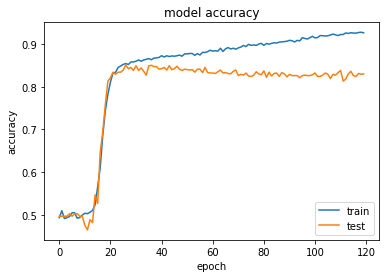

In [254]:
import matplotlib.pyplot as plt
%matplotlib inline
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

### Now will try the model on the test sets but will change the questions and the stories

In [264]:
test_data[0]

(['Mary',
  'got',
  'the',
  'milk',
  'there',
  '.',
  'John',
  'moved',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'John', 'in', 'the', 'kitchen', '?'],
 'no')

## The question will change here and get them in form of numbers to can predict 
sorry for using the old fuction should build new one for prediction 

In [285]:
data=(['Mary',
  'got',
  'the',
  'milk',
  'there',
  '.',
  'John',
  'moved',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'John', 'in', 'the', 'bedroom', '?'],
 'no')
storypre,question_pre,res=vectorize_Story([data])

In [286]:
storypre

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         5, 32, 37, 24, 15, 25, 26, 23, 12, 37, 11, 25]], dtype=int32)

In [287]:
respre=model.predict(([storypre,question_pre]))

In [288]:
respre.argmax()

27

In [289]:
tokenizer.word_index['yes']

27

In [290]:
test_data[100]

(['John',
  'took',
  'the',
  'apple',
  'there',
  '.',
  'John',
  'went',
  'to',
  'the',
  'bathroom',
  '.'],
 ['Is', 'John', 'in', 'the', 'hallway', '?'],
 'no')

In [291]:
data=(['John',
  'took',
  'the',
  'apple',
  'there',
  '.',
  'John',
  'went',
  'to',
  'the',
  'bathroom',
  '.'],
 ['Is', 'John', 'in', 'the', 'bathroom', '?'],
 'no')
storypre,question_pre,res=vectorize_Story([data])

In [292]:
respre=model.predict(([storypre,question_pre]))
respre.argmax()

27

In [293]:
test_data[250]

(['Mary',
  'got',
  'the',
  'apple',
  'there',
  '.',
  'John',
  'moved',
  'to',
  'the',
  'office',
  '.'],
 ['Is', 'John', 'in', 'the', 'office', '?'],
 'yes')

In [294]:
data=(['Mary',
  'got',
  'the',
  'apple',
  'there',
  '.',
  'John',
  'moved',
  'to',
  'the',
  'bathroom',
  '.'],
 ['Is', 'John', 'in', 'the', 'office', '?'],
 'no')
storypre,question_pre,res=vectorize_Story([data])

In [295]:
respre=model.predict(([storypre,question_pre]))
respre.argmax()

35